# Initial envirnoment



In [11]:
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow_hub as hub
from tensorflow.keras import layers
import numpy as np
from tensorflow import keras
import os


use_cuda = True


#test GPU
x = tf.random_uniform([3, 3])

print("Is there a GPU available: "),
print(tf.test.is_gpu_available())

print("Is the Tensor on GPU #0:  "),
print(x.device.endswith('GPU:0'))


## google drive
from google.colab import drive
drive.mount('/content/drive')

Is there a GPU available: 
False
Is the Tensor on GPU #0:  
False
Mounted at /content/drive


# Setting parameters

In [18]:
# 目录和数据参数常量的设置
#路径
data_path = "/content/drive/My Drive/datasets"
data_path= data_path+"/food_8_classes"
print("content path:",data_path,"\n")


#image parameters
IMAGE_SHAPE = (224, 224)
validation_split = 0.1
classes = 20


#fit param
epochs = 20
batch_size = 32



#name
model_name = "AlexNet_Model"
save_name = "AlexNet_Model"
edition = "final_2_step"


#saving
path_5h = "/content/drive/My Drive/model_saving/AlexNet Model "+str(epochs)+" step model/AlexNet_"+str(epochs)+"_step.h5"
save_path = os.path.abspath("/content/drive/My Drive/model_saving/AlexNet Model "+str(epochs)+" step model/AlexNet_"+str(epochs)+"_step")


content path: /content/drive/My Drive/datasets/food_8_classes 



# Dealing Data 


In [19]:
#dataset generator
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                  validation_split=validation_split)

#traing set
train_data = image_generator.flow_from_directory(str(data_path),
                                                 target_size=IMAGE_SHAPE,
                                                 batch_size=batch_size,
                                                 subset = 'training'
                                                )
#testing set
test_data = image_generator.flow_from_directory(str(data_path),
                                                 target_size=IMAGE_SHAPE,
                                                 batch_size=batch_size,
                                                 subset = 'validation'
                                                )



print("traing data shape: ",train_data.image_shape)
print("training data batch size: ",train_data.batch_size)
print("trainig data classes number: ",train_data.num_classes)
print("training data samples number: ",train_data.samples,"\n","\n")

print("test data shape: ",test_data.image_shape)
print("test data batch size: ",test_data.batch_size)
print("test data classes number: ",test_data.num_classes)
print("test data sample number: ",test_data.samples)


Found 7200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
traing data shape:  (224, 224, 3)
training data batch size:  32
trainig data classes number:  8
training data samples number:  7200 
 

test data shape:  (224, 224, 3)
test data batch size:  32
test data classes number:  8
test data sample number:  800


# Building AlexNet

In [0]:
from tensorflow import keras
from tensorflow.keras import layers
input_shape = (224, 224, 3)

inputs = keras.Input(train_data.image_shape, name='food_classification')
# 1 st layer
x = layers.Conv2D(96, kernel_size=(11,11),strides=4,padding='valid',input_shape=input_shape,activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=3,strides = 2)(x)
x = layers.BatchNormalization()(x)

# 2 nd layer
x = layers.Conv2D(256, kernel_size=(5, 5),strides=1,padding='valid',activation='relu')(x)
x = layers.MaxPooling2D(pool_size=3,strides=2)(x)
x = layers.BatchNormalization()(x)


#3rd conv
x = layers.Conv2D(384, kernel_size=(3, 3),padding='valid',strides=1,activation='relu')(x)
x = layers.BatchNormalization()(x)
#4th conv
x = layers.Conv2D(384, kernel_size=(3, 3),padding='valid',strides=1,activation='relu')(x)
x = layers.BatchNormalization()(x)
#5th
x = layers.Conv2D(256, kernel_size=(3, 3),padding='valid',strides=1,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=3,strides=2)(x)
x = layers.BatchNormalization()(x)

#dense layers 
x = layers.Flatten()(x)#flatten是进入dense层中必须的过程

#1st dense 
x = layers.Dense(4096,activation='relu')(x)
x = layers.Dropout(0.4)(x)
x = layers.BatchNormalization()(x)
  #2nd dense
x = layers.Dense(4096,activation='relu')(x)
x = layers.Dropout(0.4)(x)
x = layers.BatchNormalization()(x)

#3rd dense layer
x = layers.Dense(1000,activation='relu')(x)
x = layers.Dropout(0.4)(x)
x = layers.BatchNormalization()(x)

#output layer
outputs = layers.Dense(train_data.num_classes,activation = 'softmax')(x)


#放在model里面
model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')
#model.summary()



#compile
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


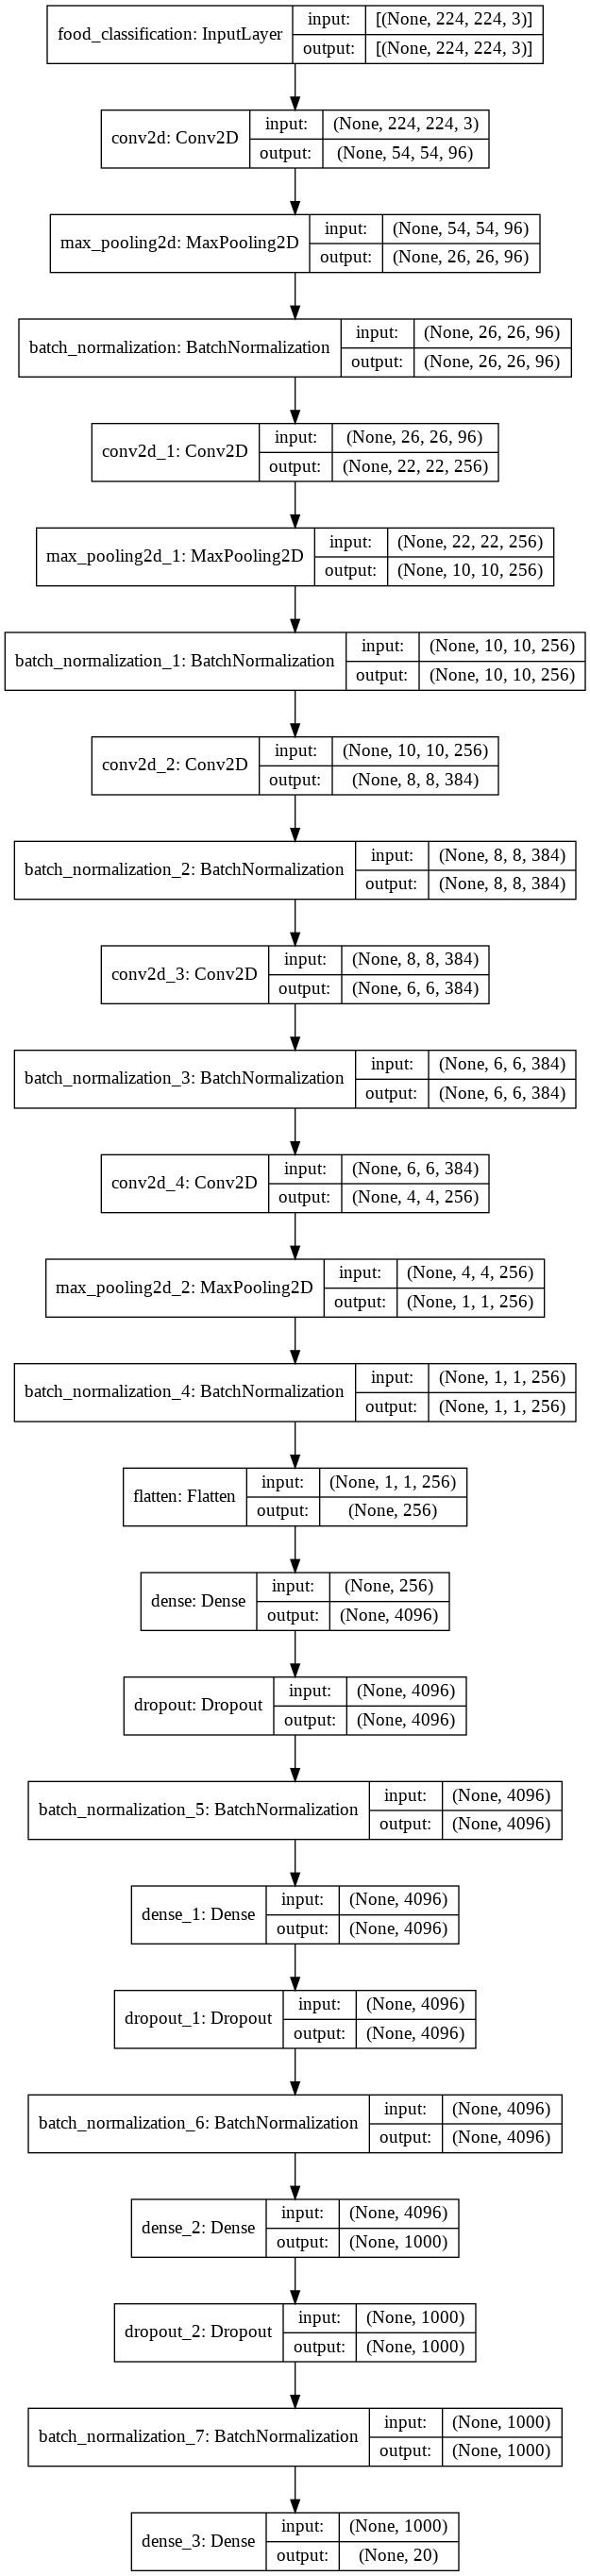

In [0]:
from tensorflow import keras
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

# Fit

In [0]:
#for plot step acc and loss(not bitch just step)
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    self.model.reset_metrics()


# #fit param

# epochs = 20
# batch_size =100

#fit
steps_per_epoch = np.ceil(train_data.samples/train_data.batch_size)
batch_stats_callback = CollectBatchStats()
history = model.fit(train_data, 
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data = test_data,
                    callbacks = [batch_stats_callback])

Epoch 1/20
535/535 [==============================] - 9685s 18s/step - loss: 3.0864 - acc: 0.0625 - val_loss: 7.8685 - val_acc: 0.0832
Epoch 2/20
535/535 [==============================] - 1346s 3s/step - loss: 2.6437 - acc: 0.2188 - val_loss: 2.9630 - val_acc: 0.2105
Epoch 3/20
535/535 [==============================] - 1310s 2s/step - loss: 2.3606 - acc: 0.2812 - val_loss: 2.4830 - val_acc: 0.3263
Epoch 4/20
535/535 [==============================] - 1219s 2s/step - loss: 2.2336 - acc: 0.2812 - val_loss: 3.6963 - val_acc: 0.1968
Epoch 5/20
535/535 [==============================] - 1197s 2s/step - loss: 2.0795 - acc: 0.4062 - val_loss: 2.5009 - val_acc: 0.3021
Epoch 6/20
535/535 [==============================] - 1183s 2s/step - loss: 1.9494 - acc: 0.3750 - val_loss: 2.0967 - val_acc: 0.3616
Epoch 7/20
535/535 [==============================] - 1186s 2s/step - loss: 1.8691 - acc: 0.4375 - val_loss: 1.9760 - val_acc: 0.4074
Epoch 8/20
535/535 [==============================] - 1186s 2

#plot 

## plot step acc and loss

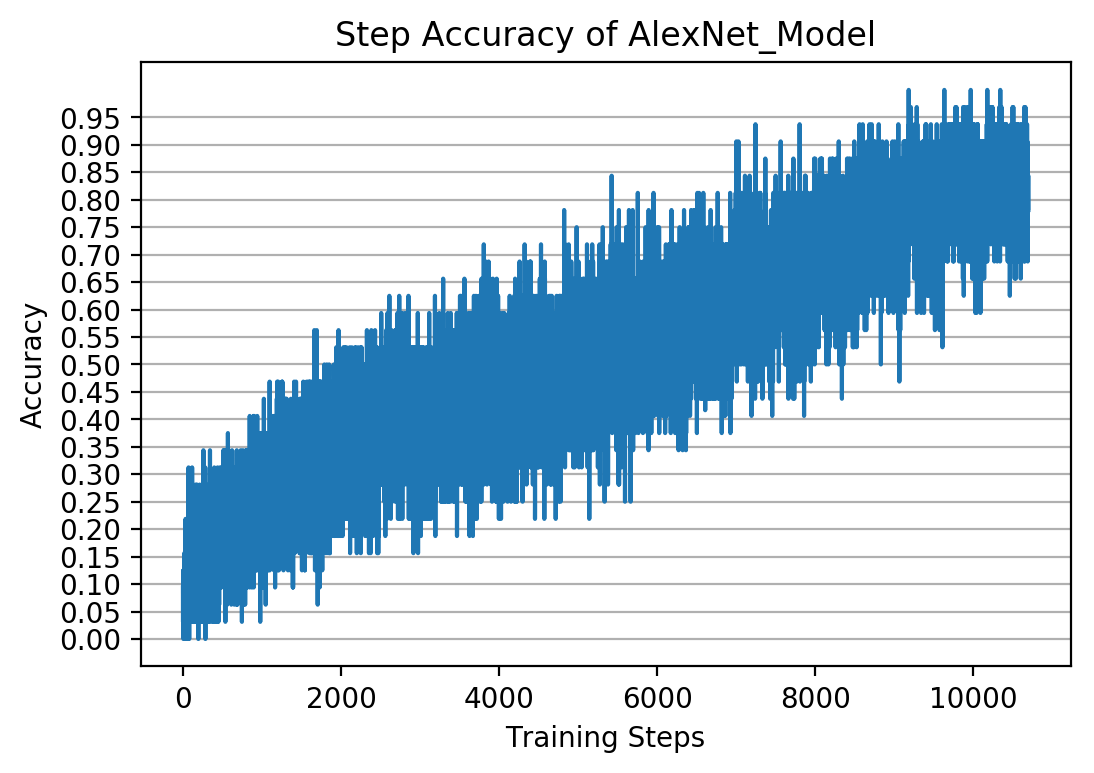

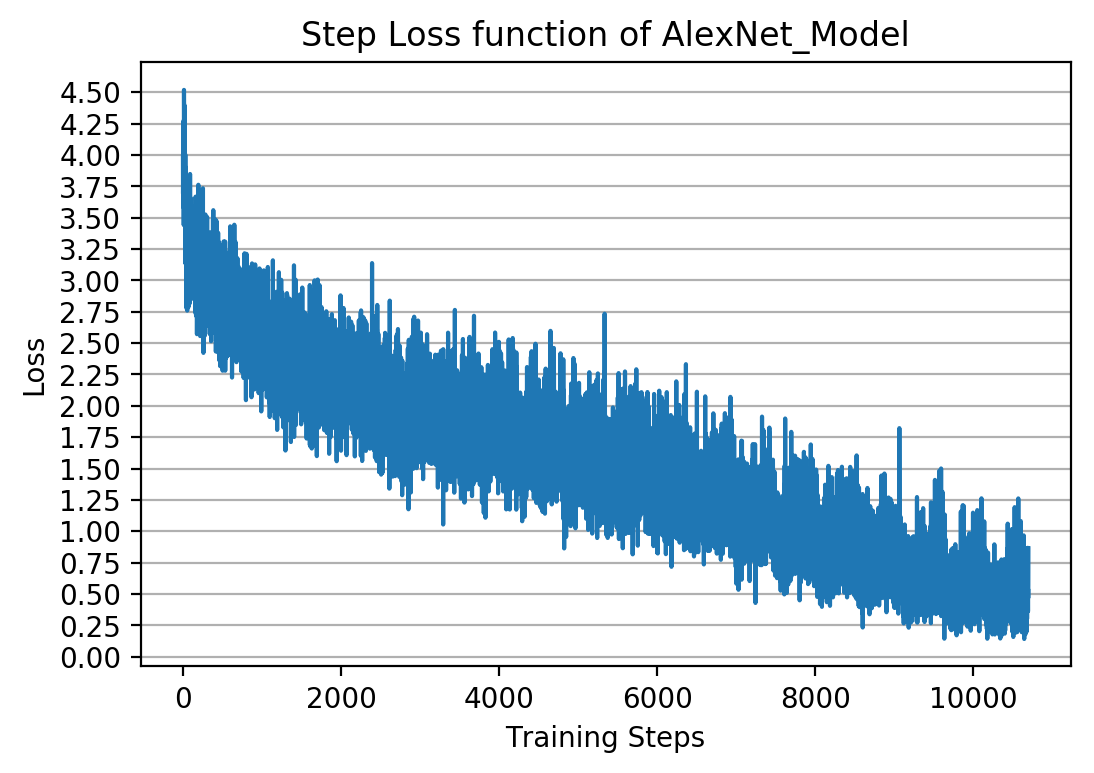

In [0]:
# plot param
title_acc = "Step Accuracy of "+model_name
title_loss = "Step Loss function of "+model_name


plt.rcParams['savefig.dpi'] = 200 
plt.rcParams['figure.dpi'] = 200 
plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")  
plt.title(title_acc) 
y_ticks = np.arange(0, 1, 0.05)
plt.yticks(y_ticks)          #显示范围为-2至2，每0.2显示一刻度
plt.grid(axis="y")
plt.plot(batch_stats_callback.batch_acc)


plt.show()




plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.title(title_loss) 
y_ticks = np.arange(0, 5, 0.25)
plt.yticks(y_ticks)          #显示范围为-2至2，每0.2显示一刻度
plt.grid(axis="y")

plt.rcParams['savefig.dpi'] = 200 
plt.rcParams['figure.dpi'] = 200 
plt.plot(batch_stats_callback.batch_losses)

## plot epoch acc loss and valid acc and valid loss

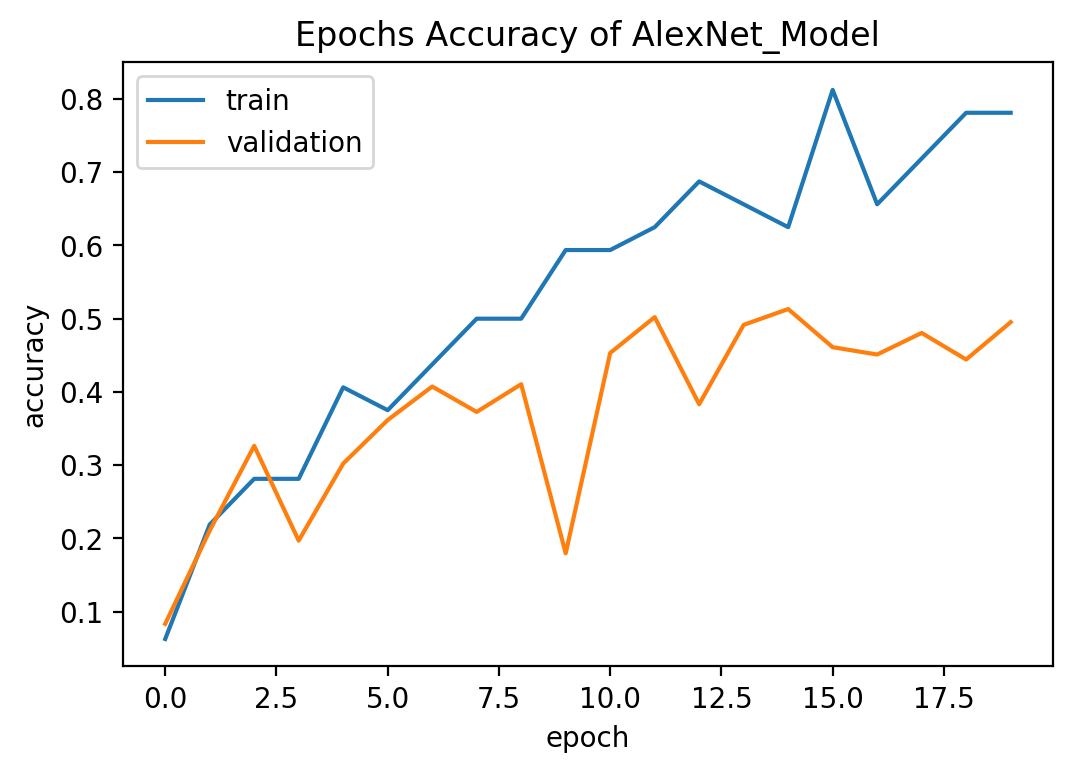

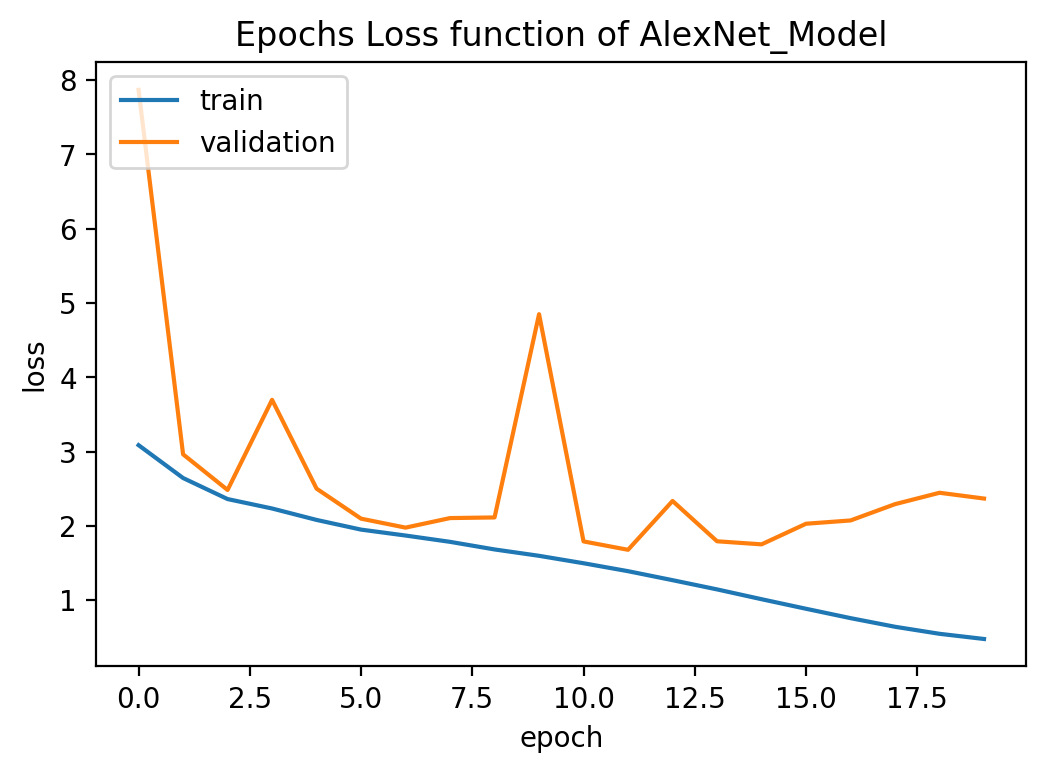

In [0]:
epoch_acc = "Epochs Accuracy of "+model_name
epoch_loss = "Epochs Loss function of "+model_name


# acc
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title(epoch_acc )
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(epoch_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluation

In [0]:
# evaluat model by test data
loss, acc = model.evaluate(test_data)

60/60 [==============================] - 34s 567ms/step - loss: 2.3448 - acc: 0.4953


# Prediction 

## Plot samples

In [0]:
# pick up a bitch test set
image_test, label_test = test_data.next()
# print("Image batch shape: ", image_test.shape)
# print("Label batch shape: ", label_test.shape)

#decode class name from index number 
class_names = sorted(test_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])


predicted_batch = model.predict(image_test)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
label_id = np.argmax(label_test, axis=-1)


##plot and print out the acc 
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_test[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
  plt.suptitle(model_name+" Model predictions \n(green: correct, red: incorrect)")
loss, acc = model.evaluate(image_test, label_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Output hidden; open in https://colab.research.google.com to view.

## Confusion matrix

[[ 3  6  2  4  5  4  5  1  7  5  3  9  1  7  3  8  4  0  8 15]
 [ 4  4 10  4  7  4  2  2  4  5 12  4  4  2  7  6  4  0 10  5]
 [ 5  2 10  1  5  5  4  5  6  6  5  5  2  6  2  8  5  0  9  9]
 [11  3  5  4  6  7  5  5  5  7  5  2  5  5  4  4  7  0  7  3]
 [ 7  4  7  4  6  8  9  4  6  4  6  1  1  5  1  4  7  0  9  7]
 [13  7  3  4  8  2  1  3  6  7  8  3  5  2  3  6  8  0  7  4]
 [ 4  5  4  4  7  7  3  2 10 11  4  5  5  4  2  5  3  0  8  7]
 [ 3  5  1  5  8  8  2  5 11  7  3  5  4  3  4  3  5  0 11  7]
 [ 3  5  2  5  9 10  4  4  6  6  4  6  3  2  6  6  6  0 11  2]
 [ 6  5  3  2  6  5  2  3  8  4  7  4  9  5  5  4  7  0 11  4]
 [ 6  5  5  2  6  6  6  7  8  8  2  7  5  2  4  5  7  0  2  7]
 [ 6  7  3  3  3  7  7  4 11  3  0  2  7  5  5  3  5  0 14  5]
 [ 6  2  5  1  7  4  7  2  8  5  7  6  4  8  3  4  6  0 10  5]
 [ 7  5  6  2  6  8  6  6 11  3  0  2  9  5  6  3  4  0  5  6]
 [ 7  6  2  4  6 10  3  5  4  4  6  2  3  8  6  5  4  0  9  6]
 [ 6  4  4  2  4  3  3  5 10  7  4  4  6  6  6  5  5  0

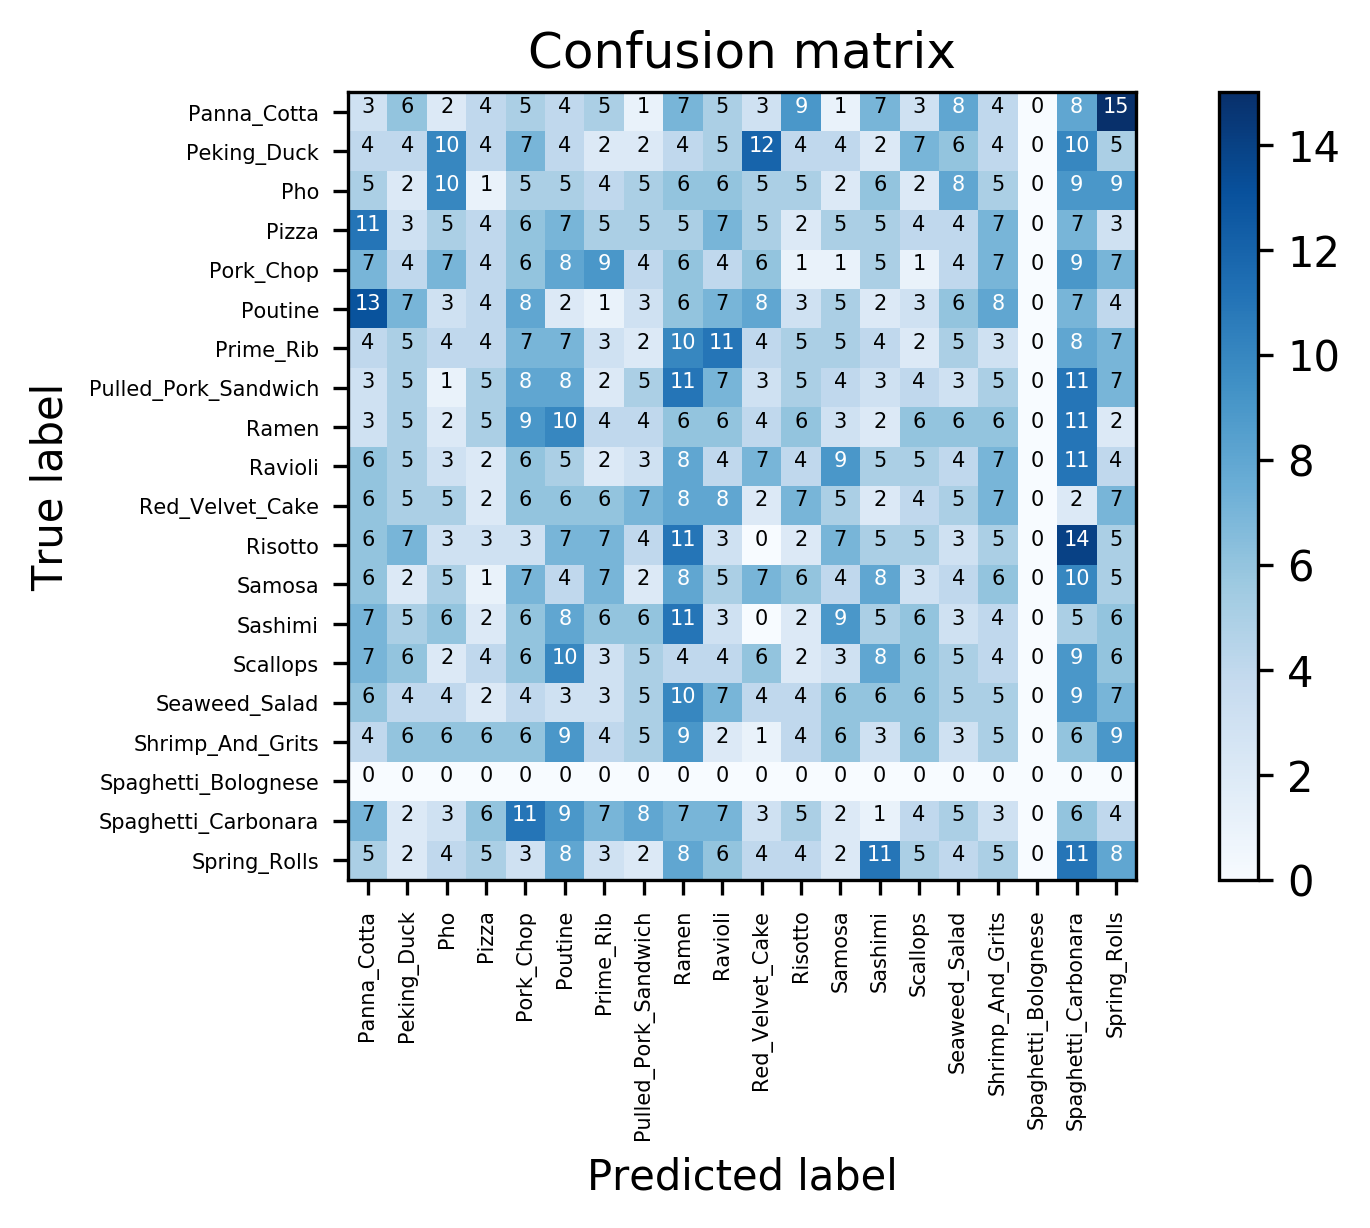

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          class_ = 8):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if (class_ == 20):
      plt.rcParams['savefig.dpi'] = 300 
      plt.rcParams['figure.dpi'] = 300 
      size = 5
    else:
      size = 10




    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90,size = size)
    plt.yticks(tick_marks, classes,size = size)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 size = size)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')





pred = model.predict(test_data)
pred_index = np.argmax(pred, axis=-1)
cm=tf.math.confusion_matrix(test_data.classes,pred_index)

##convert tensor to np.int32
sess = tf.Session()
with sess.as_default():
  cm_numpy=(cm.eval())

cm_numpy = cm_numpy.astype(np.int16)

##Google lab can not plt it just print out and plot by my own laptop
with tf.Session() as sess:  print(cm.eval()) 
print(class_names)

plot_confusion_matrix(cm_numpy,class_names,class_=classes)



# Model saving

## saving h5 model

In [0]:
path_5h = "/content/drive/My Drive/model_saving/AlexNet Model 20 classes/AlexNet_20_classes.h5"

# model.save(path_5h)

### Reload h5

In [16]:
model_h5 = tf.keras.models.load_model(path_5h)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Saving keras model


In [0]:
import os
save_path = os.path.abspath("/content/drive/My Drive/model_saving/AlexNet Model 20 step model/AlexNet_20_step")
# tf.keras.experimental.export_saved_model(model, save_path)

In [0]:
reloaded_model = tf.keras.experimental.load_from_saved_model(save_path)

Found 800 images belonging to 8 classes.
[[69  0  5  1  5  7 10  3]
 [ 0 63 10  2  5  4 10  6]
 [ 8  1 58  5  8  2  9  9]
 [ 4  1 24 45 10  3  0 13]
 [17  1  6  5 57  3  4  7]
 [18  6  6  0  9 49  4  8]
 [16  6 18  6  6  2 43  3]
 [11  1  9  8 13  3  4 51]]
['Steak' 'Strawberry_Shortcake' 'Sushi' 'Tacos' 'Takoyaki' 'Tiramisu'
 'Tuna_Tartare' 'Waffles']
Confusion matrix, without normalization
[[69  0  5  1  5  7 10  3]
 [ 0 63 10  2  5  4 10  6]
 [ 8  1 58  5  8  2  9  9]
 [ 4  1 24 45 10  3  0 13]
 [17  1  6  5 57  3  4  7]
 [18  6  6  0  9 49  4  8]
 [16  6 18  6  6  2 43  3]
 [11  1  9  8 13  3  4 51]]


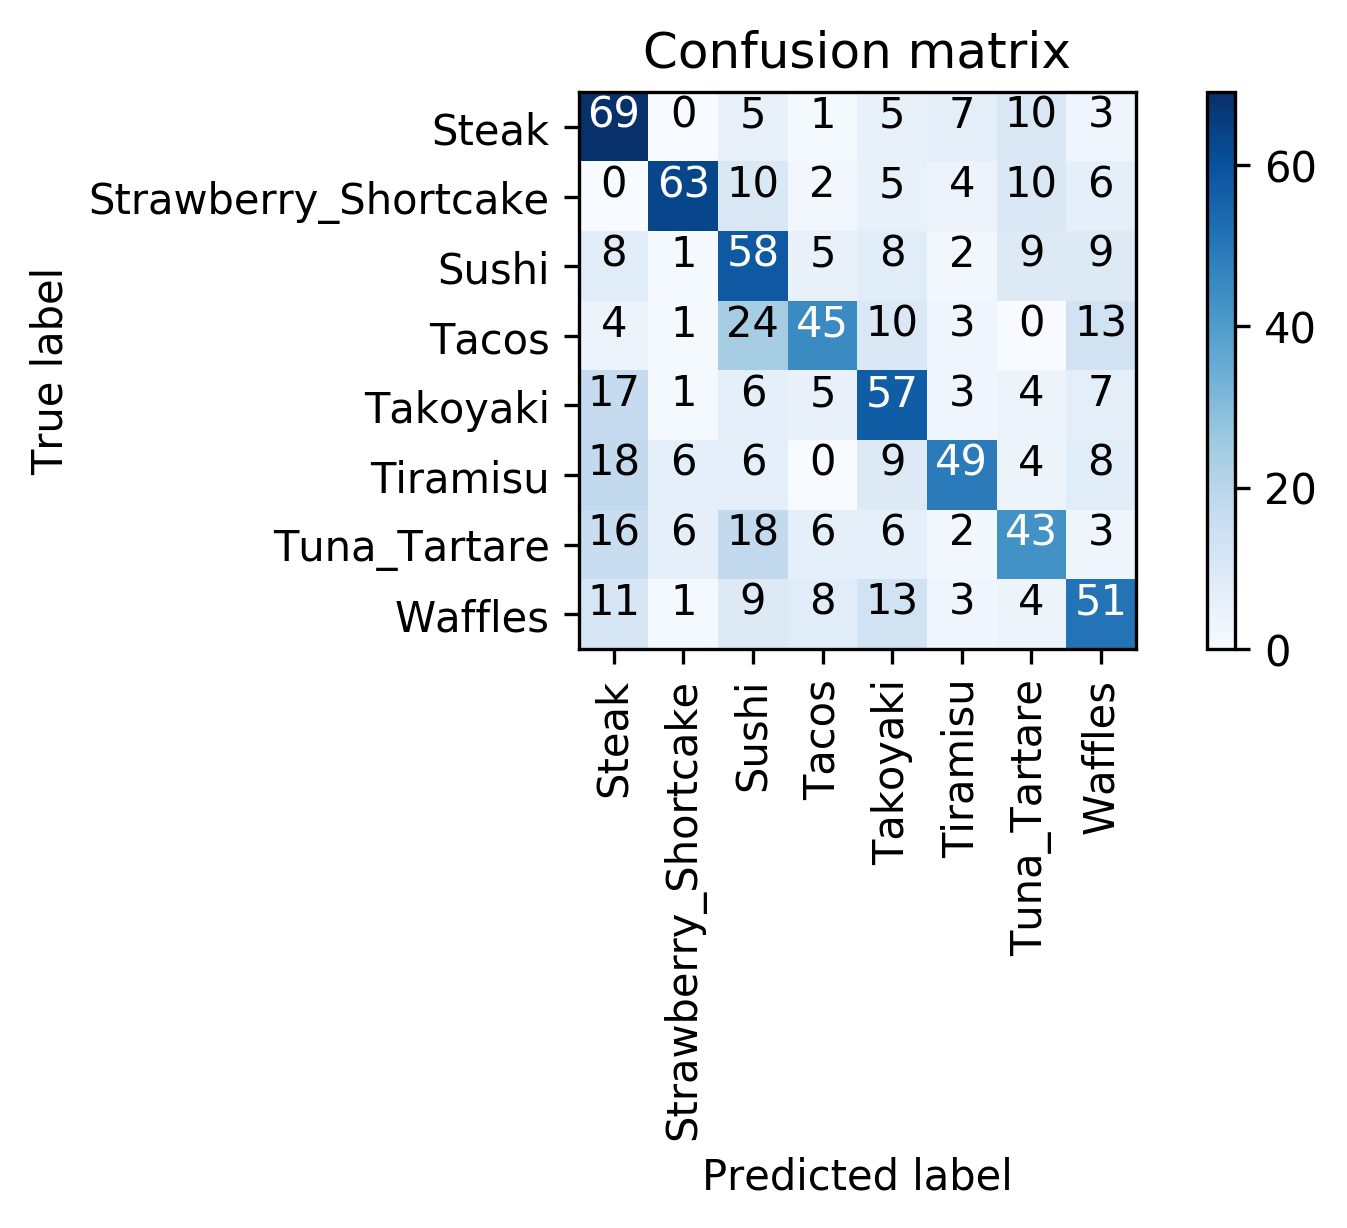

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import itertools


test_data = image_generator.flow_from_directory(str(data_path),
                                                 target_size=IMAGE_SHAPE,
                                                 batch_size=batch_size,
                                                 subset = 'validation',
                                                shuffle = False
                                                )

class_names = sorted(test_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])






plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          class_ = 8):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if (class_ == 20):

      size = 5
    else:
      size = 10




    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90,size = size)
    plt.yticks(tick_marks, classes,size = size)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 size = size)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')





pred = reloaded_model.predict(test_data)
pred_index = np.argmax(pred, axis=-1)
cm=tf.math.confusion_matrix(test_data.classes,pred_index)

##convert tensor to np.int32
sess = tf.Session()
with sess.as_default():
  cm_numpy=(cm.eval())

cm_numpy = cm_numpy.astype(np.int16)

##Google lab can not plt it just print out and plot by my own laptop
with tf.Session() as sess:  print(cm.eval()) 
print(class_names)

plot_confusion_matrix(cm_numpy,class_names,class_=8)

